In [1]:
%load_ext rpy2.ipython

In [3]:
%%R
install.packages(c("tidyverse", "survival", "ggsurvfit", "gtsummary", "survminer"), repos='http://cran.us.r-project.org')

library(tidyverse)     # для удобной работы с таблицами
library(survival)      # для анализа выживаемости
library(ggsurvfit)     # красивые графики выживаемости
library(gtsummary)     # таблицы с результатами
library(survminer)     # визуализация с p-value, рисками и др.

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependencies ‘rbibutils’, ‘Deriv’, ‘microbenchmark’, ‘Rdpack’, ‘numDeriv’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘V8’, ‘litedown’, ‘reactR’, ‘corrplot’, ‘car’, ‘png’, ‘jpeg’, ‘bigD’, ‘bitops’, ‘juicyjuice’, ‘markdown’, ‘reactable’, ‘ggrepel’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘polynom’, ‘rstatix’, ‘exactRankTests’, ‘mvtnorm’, ‘KMsurv’, ‘zoo’, ‘km.ci’, ‘gridtext’, ‘patchwork’, ‘cards’, ‘gt’, ‘ggpubr’, ‘gridExtra’, ‘maxstat’, ‘survMisc’, ‘ggtext’

trying URL 'http://cran.us.r-project.org/src/contrib/rbibutils_2.3.tar.gz'
trying URL 'http://cran.us.r-project.org/src/contrib/Deriv_4.1.6.tar.gz'
trying URL 'http://cran.us.r-project.org/src/contrib/microbenchmark_1.5.0.tar.gz'
trying URL 'http://cran.us.r-project.org/src/contrib/Rdpack_2.6.4.tar.gz'
trying URL 'http://cran.us.r-project.or

In [ ]:
%%R
install.packages("cardx", repos = "https://cloud.r-project.org")
library(cardx)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cloud.r-project.org/src/contrib/cardx_0.2.4.tar.gz'
Content type 'application/x-gzip' length 185685 bytes (181 KB)
downloaded 181 KB


The downloaded source packages are in
	‘/tmp/RtmphYBVRh/downloaded_packages’


In [24]:
%%R
# 2. Загружаем датасет ------------------------------------------------------
colon <- read_tsv("colon_dataset.tsv")

# 3. Проверяем структуру данных (по желанию) -------------------------------
glimpse(colon)   # Показывает переменные и их типы

Rows: 1858 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (1): rx
dbl (15): id, study, sex, age, obstruct, perfor, adhere, nodes, status, diff...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1,858
Columns: 16
$ id       <dbl> 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10,…
$ study    <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ rx       <chr> "Lev+5FU", "Lev+5FU", "Lev+5FU", "Lev+5FU", "Obs", "Obs", "Le…
$ sex      <dbl> 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0…
$ age      <dbl> 43, 43, 63, 63, 71, 71, 66, 66, 69, 69, 57, 57, 77, 77, 54, 5…
$ obstruct <dbl> 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ perfor   <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ adhere   <dbl> 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0

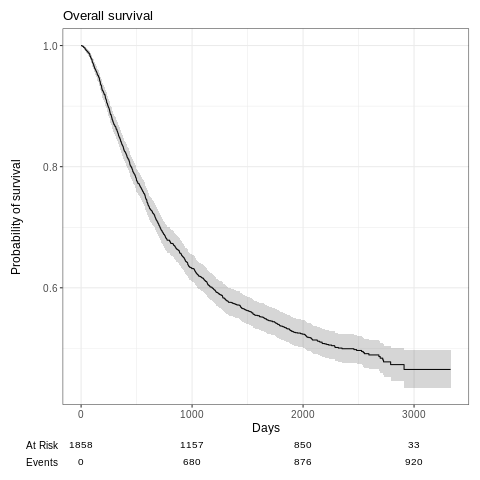

In [25]:
%%R

# 4. Преобразуем переменные, если нужно ------------------------------------
# Преобразуем переменные в понятные человеку подписи:
colon <- colon %>%
  mutate(
    sex = factor(sex, levels = c(0,1), labels = c("Women", "Men")),
    rx = factor(rx), # Тип лечения: "Lev", "Lev+5FU", "Obs"
    status = ifelse(status == 1, 1, 0)  # 1 = смерть, 0 = жив (цензурировано)
  )

# 5. Общая кривая выживаемости ---------------------------------------------
fit_all <- survfit(Surv(time, status) ~ 1, data = colon)

ggsurvfit(fit_all) +
  labs(title = "Overall survival",
       x = "Days",
       y = "Probability of survival") +
  add_confidence_interval() +
  add_risktable()

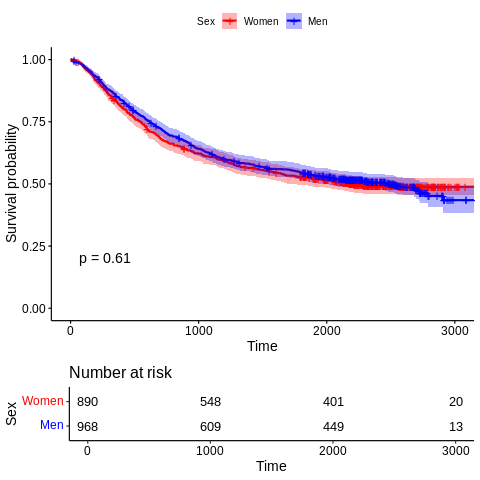

In [26]:
%%R


# 6. Сравнение выживаемости по полу ----------------------------------------
fit_sex <- survfit(Surv(time, status) ~ sex, data = colon)

ggsurvplot(
  fit_sex,
  data = colon,
  pval = TRUE,               # Добавляет p-value (лог-ранг тест)
  conf.int = TRUE,           # Показывает доверительный интервал
  legend.title = "Sex",
  legend.labs = c("Women", "Men"),
  risk.table = TRUE,         # Таблица: сколько пациентов в группе на каждом этапе
  palette = c("red", "blue")
)

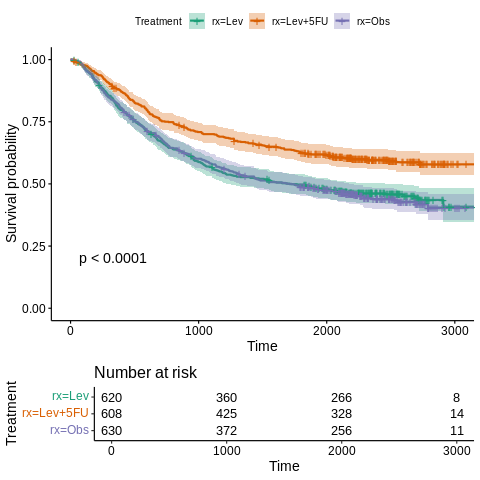

In [27]:
%%R

# 7. Сравнение выживаемости по лечению -------------------------------------
fit_rx <- survfit(Surv(time, status) ~ rx, data = colon)

ggsurvplot(
  fit_rx,
  data = colon,
  pval = TRUE,
  conf.int = TRUE,
  legend.title = "Treatment",
  risk.table = TRUE,
  palette = "Dark2"
)

In [29]:
%%R

# 8. Таблица: вероятность выжить 1 год -------------------------------------
summary(fit_rx, times = 365.25, label_header = "**1-year survival rate (95% CI)**")


Call: survfit(formula = Surv(time, status) ~ rx, data = colon)

                rx=Lev 
        time       n.risk      n.event     survival      std.err lower 95% CI 
    365.2500     502.0000     115.0000       0.8138       0.0157       0.7836 
upper 95% CI 
      0.8451 

                rx=Lev+5FU 
        time       n.risk      n.event     survival      std.err lower 95% CI 
    365.2500     530.0000      73.0000       0.8795       0.0132       0.8540 
upper 95% CI 
      0.9058 

                rx=Obs 
        time       n.risk      n.event     survival      std.err lower 95% CI 
    365.2500     518.0000     112.0000       0.8222       0.0152       0.7929 
upper 95% CI 
      0.8526 



In [30]:
%%R

# 9. Таблица: медианное время жизни ----------------------------------------
summary(fit_rx, probs = 0.5, label_header = "**Median survival(95% CI)**")

Call: survfit(formula = Surv(time, status) ~ rx, data = colon)

                rx=Lev 
 time n.risk n.event survival std.err lower 95% CI upper 95% CI
   19    620       1    0.998 0.00161        0.995        1.000
   24    619       1    0.997 0.00228        0.992        1.000
   28    617       1    0.995 0.00279        0.990        1.000
   35    616       1    0.994 0.00322        0.987        1.000
   38    615       1    0.992 0.00360        0.985        0.999
   56    614       1    0.990 0.00394        0.983        0.998
   62    612       2    0.987 0.00454        0.978        0.996
   72    610       1    0.985 0.00481        0.976        0.995
   77    609       1    0.984 0.00507        0.974        0.994
   78    608       1    0.982 0.00531        0.972        0.993
   80    607       1    0.981 0.00554        0.970        0.992
   85    606       1    0.979 0.00577        0.968        0.990
   91    605       1    0.977 0.00598        0.966        0.989
   93    604    

In [31]:
%%R

# 10. Лог-ранг тест для проверки различий ----------------------------------
survdiff(Surv(time, status) ~ rx, data = colon)


Call:
survdiff(formula = Surv(time, status) ~ rx, data = colon)

             N Observed Expected (O-E)^2/E (O-E)^2/V
rx=Lev     620      333      295      4.93      7.26
rx=Lev+5FU 608      242      326     21.61     33.54
rx=Obs     630      345      299      7.01     10.40

 Chisq= 33.6  on 2 degrees of freedom, p= 5e-08 


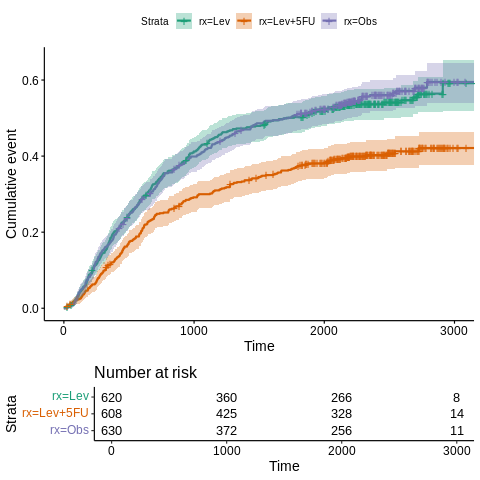

In [32]:
%%R

# 11. Кумулятивная вероятность события (не выживание, а смерть) ------------
ggsurvplot(
  fit_rx,
  data = colon,
  conf.int = TRUE,
  fun = "event",            # Показывает накопленную вероятность смерти
  palette = "Dark2",
  risk.table = TRUE
)